# 딥러닝 (Week 4. Decision Tree)

by Kyoungwon Seo (Dept. of Applied Artificial Intelligence, SeoulTech)
- e: kwseo@seoultech.ac.kr
- w: https://hai.seoultech.ac.kr

강의계획
1. 결정 트리 학습과 시각화
2. 예측하기
3. 클래스 확률 추정
4. CART 훈련 알고리즘
5. 계산 복잡도
6. 지니 불순도 또는 엔트로피
7. 규제 매개변수
8. 회귀
9. 불안정성

## 1. 결정 트리 학습과 시각화

### 1) 특징

- 결정 트리(decision tree)의 기본 특징
  - 분류, 회귀, 다중출력이 가능한 다재다능한 머신러닝 알고리즘
  - Week 2에서 캘리포니아 주택 가격 데이터셋에 과대적합했던 알고리즘이 바로 "결정 트리"
  - 랜덤 포레스트(random forest)의 기본 구성 요소임

- 결정트리의 장점
  - 데이터 전처리가 필요하지 않다 ♣♣♣
  - 화이트박스(white box)모델이다: 직관적이고 결정 방식을 이해하기가 쉽다
    - 랜덤 포레스트나 신경망은 블랙박스(black box) 모델임 ♣♣

- 계산복잡도
    - 예측을 하려면 결정 트리를 루트 노드에서부터 리프 노드까지 탐색해야 함
    - 즉, 결정 트리를 탐색할 때 $O(log_2(m))$개의 노드를 거쳐야 함 (m: 훈련 데이터 수) --> 예측 속도가 빠름 ♣♣
    - 훈련을 할때에는 모든 특성 n에 대해 비교해야 하기 때문에 $O(n*mlog_2(m))$으로 증가 ♣♣

In [30]:
from sklearn import datasets
from sklearn import tree

iris = datasets.load_iris()

X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = tree.DecisionTreeClassifier(max_depth=2) # depth가 커질수록 overfitting되기 때문에 2로만 설정
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

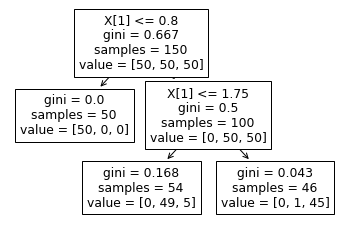

In [31]:
tree.plot_tree(tree_clf)

- 용어들
  - gini ?
  - samples ?
  - value ?

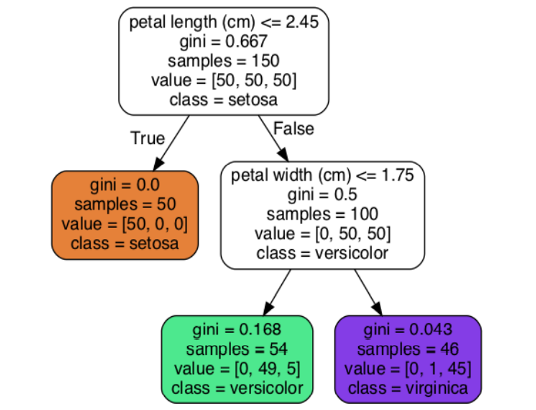

### 2) 용어

- 루트노드(root node)
  - 깊이가 0인 맨 꼭대기의 노드 ♣♣
  - 꽃잎의 길이(petal length)가 2.45cm보다 짧은지 검사함
    - 만약 짧으면 왼쪽의 자식 노드(child node)로 이동 --> 자식 노드를 가지지 않는 리프 노드(leaf node)에 해당
    - 만약 2.45cm보다 길면 추가로 '꽃잎의 너비(petal width)가 1.75cm보다 작은지' 검사
      - 만약 그렇다면 이 꽃은 아마도 Iris-Versicolor
      - 그렇지 않다면 Iris-Virginica

- 지니 불순도(gini impurity) ♣♣
  - 한 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드를 순수(gini=0)하다고 함
  - i번째 노드에 있는 훈련 샘플 중 클래스 k에 속한 샘플의 비율
    - 예: 깊이 2의 왼쪽 노드의 gini 점수는 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 = 0.168

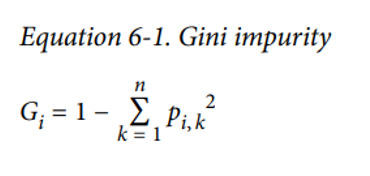

### 3) 알고리즘 종류

- CART 알고리즘: 사이킷런에서 이진 트리를 만드는데 사용되는 알고리즘 (리프 노드 외의 모든 노드는 자식 노드를 두 개씩 가짐) ♣♣
- ID3 알고리즘: 둘 이상의 자식 노드를 가진 결정 트리를 만들 수 있음 ♣♣

### 6) 클래스 확률 추정

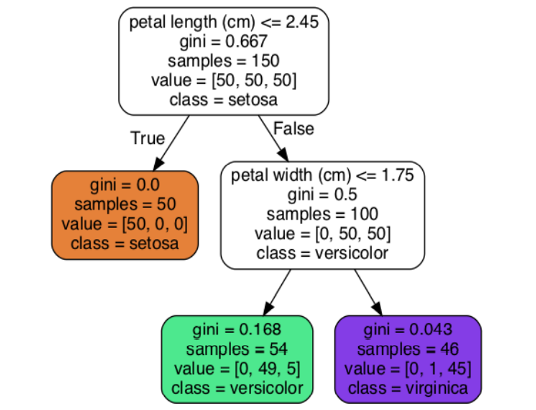

- 결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수 있음
- 예: 길이가 5cm이고 너비가 1.5cm인 꽃잎을 발견했을 때
  - 이에 해당하는 리프 노드는 깊이 2에서 왼쪽 노드
  0 이에 해당하는 확률은 Iris-Setosa 0%(0/54), Iris-Versicolor 90.7%(49/54), Iris-Virginica 9.3%(5/54) ♣♣
  - 가장 높은 확률을 갖는 Iris-Versicolor를 출력

In [33]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [34]:
tree_clf.predict([[5, 1.5]])

array([1])

### 3) 알고리즘 종류 이어서

### (1) CART 훈련 알고리즘

#### 1] 개념

- CART(classification and regression tree) 알고리즘 ♣♣

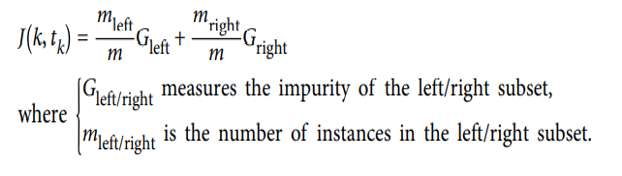

#### 2] 비용함수

**<분류에 대한 CART 비용 함수>** ♣

- CART 알고리즘은 훈련 세트를 성공적으로 둘로 나눈 후, 같은 방식으로 서브셋을 또 나누어 나감
- 최대 깊이가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈춤 ♣♣♣
- 이러한 CART 알고리즘을 탐욕적 알고리즘(greedy algorithm)이라고 함 ♣♣♣
  - 탐욕적 알고리즘은 종종 납득할만한 솔루션을 찾지만 최적의 솔루션을 보장하지는 않음
  - NP-완전(NP-Complete) 문제 : 수학적 개념임. decision tree의 CART 알고리즘이 이에 해당 ♣♣♣

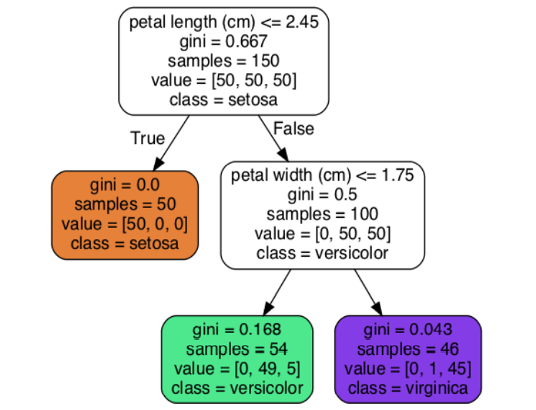

### 4) 지니 불순도 또는 엔트로피

#### (1) 엔트로피

- 결정 트리에서는 기본적으로 지니 불순도가 사용되지만 criterion 매개변수를 "entropy"로 지정하여 엔트로피 불순도를 사용할 수 있음 ♣♣
- 엔트로피는 무질서함을 측정하는 척도로 메시지의 평균 정보 양을 측정하는 섀넌의 정보 이론에서 사용됨 ♣
- 어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0 ♣♣

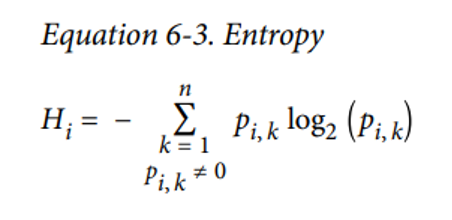

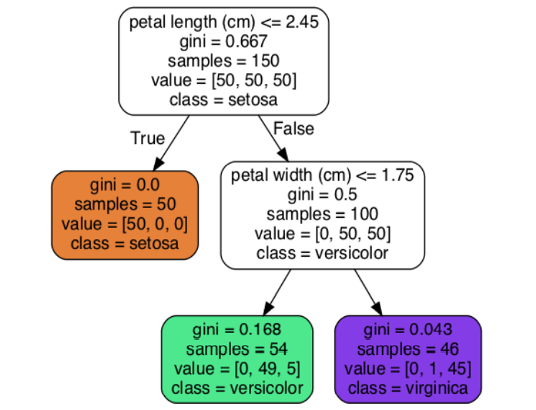

- 깊이 2의 왼쪽 노드 엔트로피: $-(49/54)log_2(49/54)-(5/54)log_2(5/54) = 0.445$ ♣

#### (2) 비교

- 지니 불순도 vs. 엔트로피 ♣♣
  - 지니 불순도가 조금 더 계산이 빠르기 때문에 기본값으로 좋음 ♣♣
  - 지니 불순도가 가장 빈도 높은 클래스를 한쪽 가지(branch)로 고립시키는 경향이 있는 반면, 엔트로피는 조금 더 균형 잡힌 트리를 만듦
      (단, 균형 잡힌 트리가 좋다고 할 수는 없기 때문에, 엔트로피가 지니 불순도보다 좋다고 할 수는 없음) ♣♣

### 5) 규제 매개변수

#### (1) 의사결정 트리 특징 + 문제점

- 결정 트리는 훈련 데이터에 대해 제약 사항이 거의 없음 (그 결과, "과대적합"되기 쉬움) ♣♣
- 결정 트리는 훈련되기 전에 파라미터 수가 결정되지 않기 때문에 비파라미터 모델(nonparametric model)이라고 부름 ♣♣
- 파라미터 모델(parametric model)의 대표적 예는 선형 모델
  - 이러한 파라미터 모델은 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한됨
  - 그 결과 과대적합될 위험이 감소 (대신, 과소적합될 위험은 커짐)

#### (2) 의사결정 트리 해결방안

- 결정 트리의 과대적합을 피하기 위해 자유도를 제한 ♣♣
  - 결정 트리의 최대 깊이 제어 (max_depth 매개변수) --> 과대적합 위험 감소
  - min_samples_split (분할되기 위해 노드가 가져야 하는 최소 샘플 수)
  - min_samples_leaf (리프 노드가 가지고 있어야 할 최소 샘플 수)
  - max_leaf_nodes
  - max_features

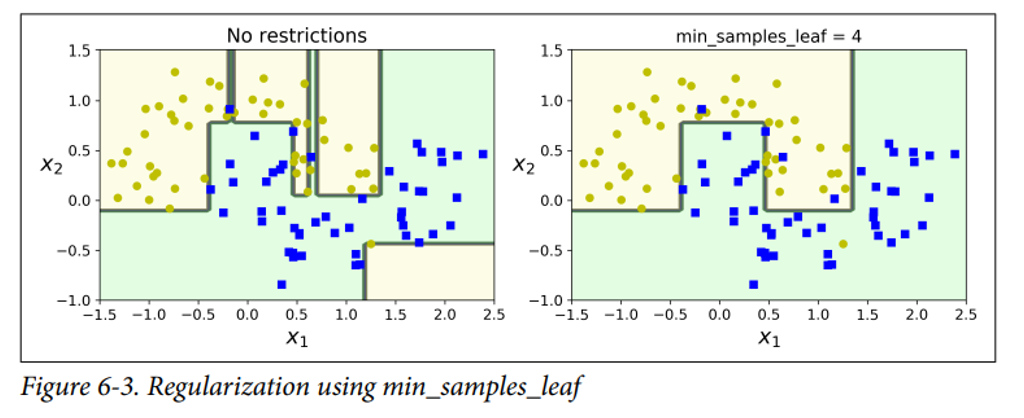

**<min_samples_leaf 매개변수를 사용한 규제>**

- 제한없이 결정트리를 훈련시키고 불필요한 노드를 가지치기(pruning)하는 알고리즘도 있음 ♣♣

### 7) 회귀

- 결정트리를 회귀 문제에도 사용할 수 있음

In [38]:
tree_reg = tree.DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

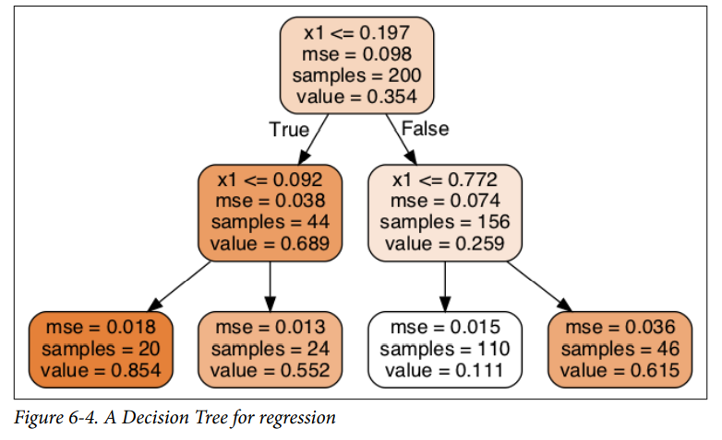

- max depth를 조정하여 과대적합 방지

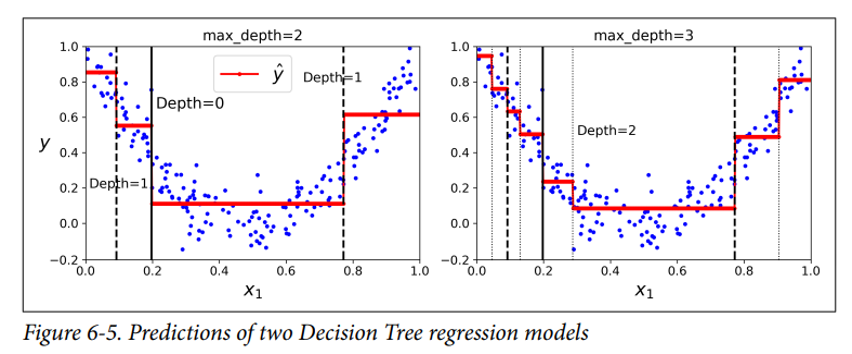

- CART 알고리즘 (with MSE) ♣♣

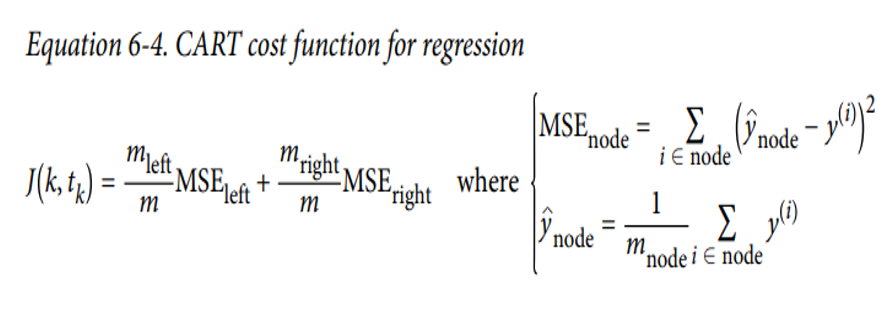

- 규제없이 진행하면 과대적합에 빠지기 쉬움

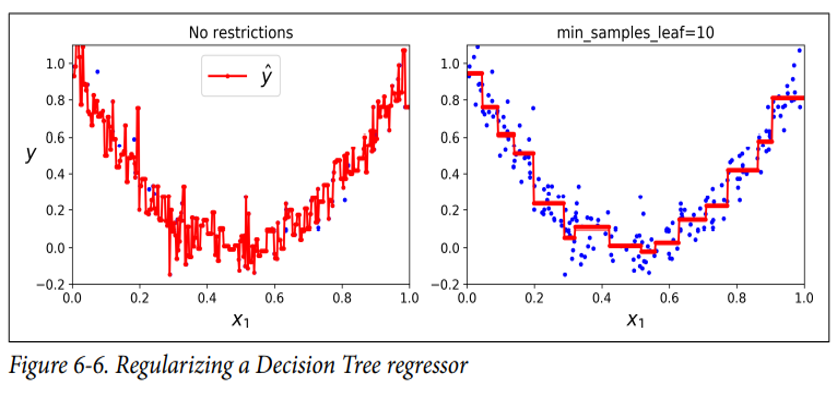

### 1) 특징 이어서 - 불안정성

- 결정트리의 장점(이해하고 해석하기 쉬움, 사용하기 편함, 다용도 가능, 성능 좋음)에도 불구하고 단점이 있음
  - 계단 모양의 결정 경계 --> 훈련 세트의 회전에 민감함 ♣♣

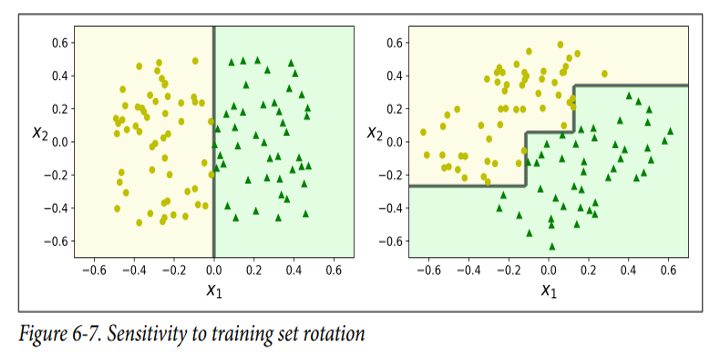

- 오른쪽으로 45도 회전한 데이터셋에 대해선 계단 모양으로 결정경계를 만들어, 일반화하기 어려움 ♣♣
  - 이를 해결하기 위해서 훈련데이터를 더 좋은 방향으로 회전시키는 PCA기법 활용 가능
- 훈련데이터에 있는 작은 변화에도 매우 민감함 ♣♣
  - 예측을 평균하여 이런 불안정성을 극복함
- 랜덤 포레스트 사용으로 Decision Tree의 단점 극복 가능 ♣